In [362]:
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import random

In [363]:
def generate_data(seed=1, N1=200, N2=200, d=2): # two class 
    np.random.seed(seed)
    # class 1
    mu1 = [0 for i in range(d)]
    cov1 = np.eye(d)*2
    x1 = np.random.multivariate_normal(mu1, cov1, N1)
    y1 = [0 for i in range(N1)]
    
    # class 2
    mu2 = [4 for i in range(d)]
    cov2 = np.eye(d)*2
    x2 = np.random.multivariate_normal(mu2, cov2, N2)
    y2 = [1 for i in range(N2)]
    
    x = np.concatenate((x1, x2), axis=0)
    y = np.concatenate((y1, y2), axis=0)
    
    N = N1 + N2
    shuffle_idx = np.random.permutation(N)
    x = x[shuffle_idx]
    y = y[shuffle_idx]
    return x,y

In [364]:
x,y = generate_data(d=2)

Text(0,0.5,'X2')

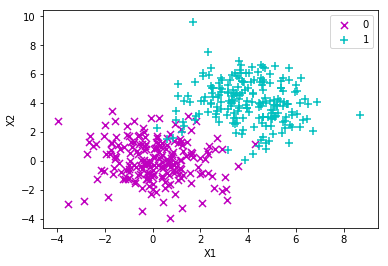

In [365]:
f2 = plt.figure()
idx_1 = np.where(y==0)
p1 = plt.scatter(x[idx_1,0], x[idx_1,1], marker = 'x', color = 'm', label='0', s = 50)
idx_2 = np.where(y==1)
p2 = plt.scatter(x[idx_2,0], x[idx_2,1], marker = '+', color = 'c', label='1', s = 50)
plt.legend(loc = 'upper right')
plt.xlabel('X1')
plt.ylabel('X2')

/Users/zhouchao/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'col_wrap'
  s)


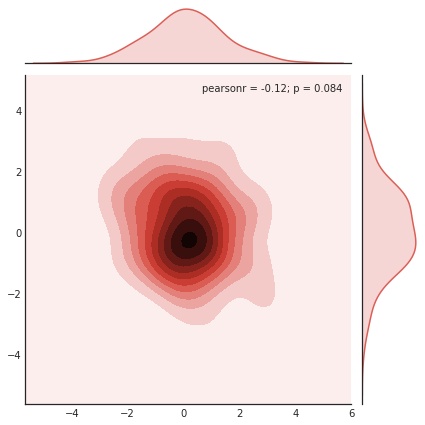

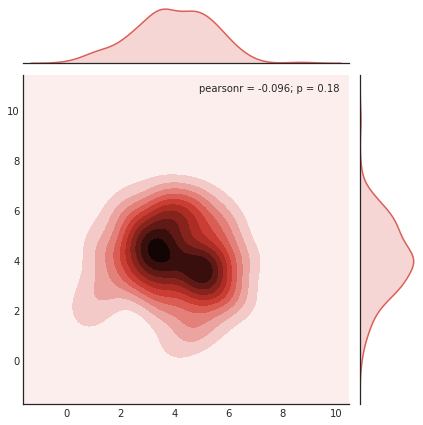

In [366]:
with sns.axes_style("white"):
    sns.jointplot(x[idx_1,0], x[idx_1,1], kind="kde",col_wrap=2)
    sns.jointplot(x[idx_2,0], x[idx_2,1], kind="kde",col_wrap=2) 

/Users/zhouchao/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


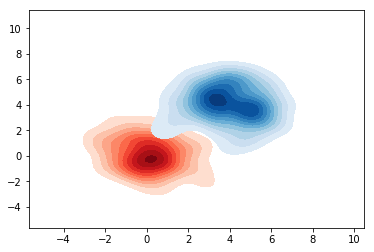

In [367]:
sns.kdeplot(x[idx_1,], shade=True, shade_lowest=False, cmap="Reds",)#, bw="silverman", gridsize=50, clip=(-11, 11),  cmap="BuGn_d")
sns.kdeplot(x[idx_2,], shade=True, shade_lowest=False, cmap="Blues", )#,bw="silverman", gridsize=50, clip=(-11, 11),  cmap="Purples")

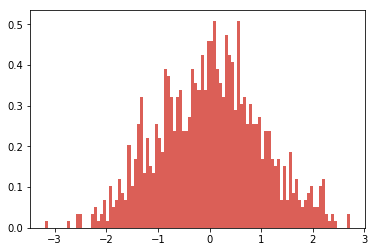

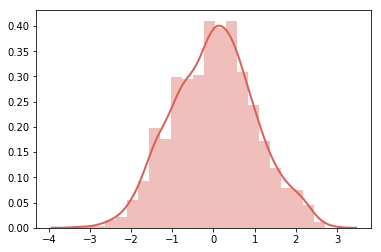

In [368]:
z = np.random.normal(size=1000)
plt.hist(z, bins=100,density=True,)
plt.show()

# distplot 简版就是hist 加上一根density curve
sns.set_palette("hls")
#mpl.rc("figure", figsize=(9, 5))
sns.distplot(z, hist = True, kde = True,
                kde_kws = {'shade': False, 'linewidth': 2}, 
                label = 'z')

In [369]:
logreg = LogisticRegression(C=1e5, solver='lbfgs')
logreg.fit(x, y)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [370]:
coef = logreg.coef_
intercept = logreg.intercept_
print(intercept, coef)

[-6.86374775] [[1.58594697 1.98230283]]


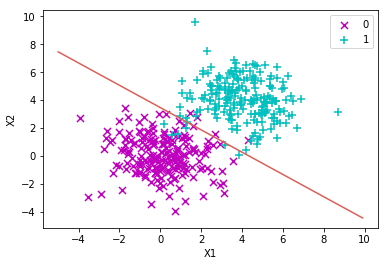

In [371]:
x0 = np.arange(-5.0, 10.0, 0.1)
y0 = (-(x0 * coef[0, 0]) - intercept[0]) / coef[0, 1]   #由sigmoid=0这个分界点 使用唯一非常量Z 来构造函数
p1 = plt.scatter(x[idx_1,0], x[idx_1,1], marker = 'x', color = 'm', label='0', s = 50)
p2 = plt.scatter(x[idx_2,0], x[idx_2,1], marker = '+', color = 'c', label='1', s = 50)
plt.legend(loc = 'upper right')
plt.xlabel('X1')
plt.ylabel('X2')
plt.plot(x0, y0)

In [372]:
# https://blog.csdn.net/qq_36523839/article/details/81604217
def Sigmoid(x):
    return 1/(1.0+np.exp(-x))

def Cross_entropy(y,h):
    return -np.sum(y*np.log(h) + (1-y)*np.log(1-h))

def gradAscent(X, y, eta=0.001, steps=10000): 
    n,m=X.shape
    X = np.concatenate((np.ones((n,1)), X), axis=1) # 添加截距项 
    w = np.ones((m+1,1))[:,0] # 初始化
    ce =[]
    for i in range(steps):
        z = np.sum(X*w, axis=1) # X*w array每个元素对应相乘,在求和给每个样本
        h = Sigmoid(z) 
        e = y - h
        ce.append(Cross_entropy(y,h))
        u = eta* np.sum(X.T * e, axis=1)
        w = w + u
        if abs(np.sum(u))/abs(np.sum(w)) < 1e-5: 
            print('stop at', i, '-th steps \n')
            break; 
        #if abs(ce[i]-ce[i-1])/abs(ce[i]) < 1e-5:
        #    print('stop at', i, '-th steps \n')
        #    break; 
    return w,ce  

In [373]:
w,ce = gradAscent(x,y)
w

stop at 4111 -th steps 



array([-6.77907994,  1.56875409,  1.95779994])

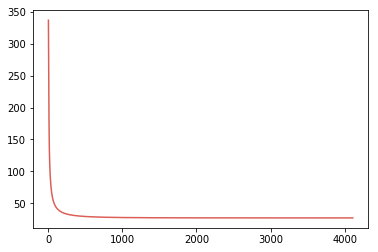

In [374]:
plt.plot(ce)

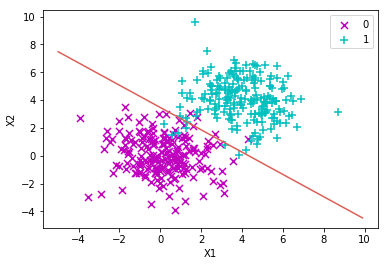

In [375]:
x0 = np.arange(-5.0, 10.0, 0.1)
y0 = (-(x0 * w[1]) - w[0]) / w[2]   #由sigmoid=0这个分界点 使用唯一非常量Z 来构造函数
p1 = plt.scatter(x[idx_1,0], x[idx_1,1], marker = 'x', color = 'm', label='0', s = 50)
p2 = plt.scatter(x[idx_2,0], x[idx_2,1], marker = '+', color = 'c', label='1', s = 50)
plt.legend(loc = 'upper right')
plt.xlabel('X1')
plt.ylabel('X2')
plt.plot(x0, y0)

In [376]:
def stocgradAscent0(X, y, eta=0.001, steps=10000): 
    n,m=X.shape
    X = np.concatenate((np.ones((n,1)), X), axis=1) # 添加截距项 
    w = np.ones((m+1,1))[:,0] # 初始化
    ce =[]
    for i in range(steps):
        for j in random.sample(range(n), 1) :
        # for j in range(n):
            h = Sigmoid(np.sum(X[j]*w))
            e = y[j] - h
            u = eta * e * X[j]
            w = w + u
            ce.append(Cross_entropy(y,h))
            if abs(np.sum(u))/abs(np.sum(w)) < 1e-5: 
                #print('stop at', i, '-th steps \n')
                break; 
    return w,ce  

In [377]:
w,ce = stocgradAscent0(x,y)
w

array([-1.09436875,  0.49638531,  0.52691976])

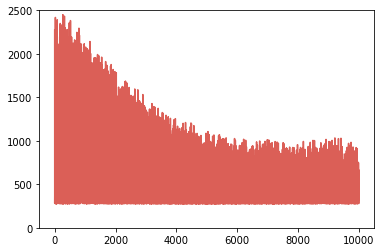

In [361]:
plt.ylim(0, 2500)
plt.plot(ce,) # 波动巨大？

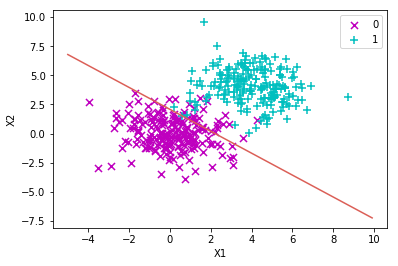

In [378]:
x0 = np.arange(-5.0, 10.0, 0.1)
y0 = (-(x0 * w[1]) - w[0]) / w[2]   #由sigmoid=0这个分界点 使用唯一非常量Z 来构造函数
p1 = plt.scatter(x[idx_1,0], x[idx_1,1], marker = 'x', color = 'm', label='0', s = 50)
p2 = plt.scatter(x[idx_2,0], x[idx_2,1], marker = '+', color = 'c', label='1', s = 50)
plt.legend(loc = 'upper right')
plt.xlabel('X1')
plt.ylabel('X2')
plt.plot(x0, y0)